# SI 370: Contingency tables, crosstabs, mosaic plots and chi-squared

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

Let's generate a data frame to play with:

In [4]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [5]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


One of the most basic transformations we can do is a crosstab.    Crosstabs are also called "contingency tables" or "two-way tables". Notice how similar it is to pivoting (or unstacking).

In [6]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


As usual, we would like to visualize our results:

In [7]:
import seaborn as sns

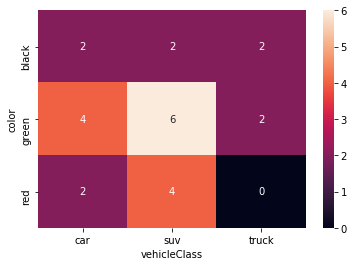

In [8]:
sns.heatmap(ct,annot=True)

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [9]:
titanic = pd.read_csv('data/titanic.csv')

In [10]:
titanic.head()

,passtype,age,status,sex
0,third,child,dead,male
1,third,child,dead,male
2,third,child,dead,male
3,third,child,dead,male
4,third,child,dead,male


Let's create a crosstab of the data:

In [11]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)

In [12]:
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


In [13]:
ct.columns

Index(['alive', 'dead', 'All'], dtype='object', name='status')

### Q1a: What are the "expected" proportions of "alive" and "dead" overall?

### Q1b: What's the expected number of expected alive and dead for each of the passenger types?

### Q2: Generate a heatmap of the titanic survivorship data, showing the count of each cell.

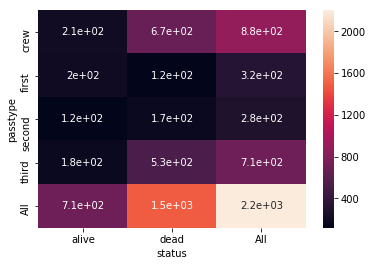

In [16]:
sns.heatmap(ct,annot=True)

### Q3: Improve your visualization by (1) excluding the marginal totals (i.e. the "All" column and the "All" row) and (2) formatting the cell labels so they appear as regular integers

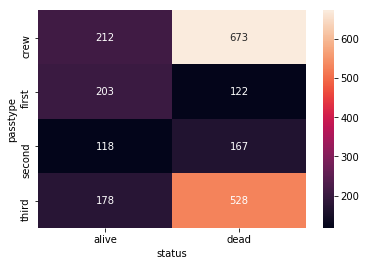

In [17]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=False)
sns.heatmap(ct,annot=True,fmt="d")

### Q4: What does the above heatmap tell you?

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

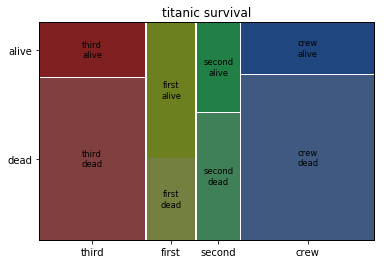

In [19]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

The width of the columns is proportional to the number in each "passtype"; the size of the vertical split is proportional to the percentage of alive vs. dead.

We can change the colors to make the plot a bit easier to read:

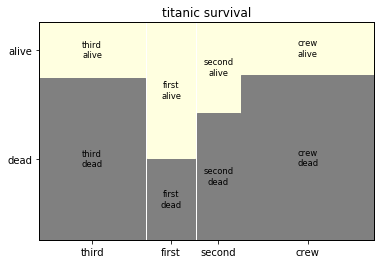

In [29]:
# slightly easier to read
props = lambda key: {'color': 'lightyellow' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

### Q5: What would the mosaic plot look like if there was no effect of passenger type on mortality?

Write your description here.

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

The formula for calculating a $\chi^2$ statistic is:

$\chi^2=\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}$

The expected value for each cell in row i and column j is given by:

$E_{ij} = \frac{T_i \times T_j}{T_{tot}}$

### Q6: Use pandas and python to calculate the $\chi^2$ statistic for the titanic data

In [25]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


In [29]:
expected = ct.copy()
expected['alive'] = expected['All'] * expected.loc['All']['alive'] / expected.loc['All']['All']
expected['dead'] = expected['All'] * expected.loc['All']['dead'] / expected.loc['All']['All']

In [33]:
observed_trimmed = ct.drop('All',axis=0).drop('All',axis=1)
expected_trimmed = expected.drop('All',axis=0).drop('All',axis=1)

In [35]:
observed_trimmed

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


In [40]:
difference = (observed_trimmed - expected_trimmed)**2 / expected_trimmed

In [46]:
difference.columns

Index(['alive', 'dead', 'sum'], dtype='object', name='status')

In [49]:
difference['sum'] = difference.sum(axis=1)


In [51]:
difference.loc['sum'] = difference.sum(axis=0)

In [53]:
difference['sum']['sum']

190.4011036168333

### Chi-square the easy way

In [33]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.4011036168333
p-val =  4.999927529867932e-41
degree of freedom =  3
Expected:


,0,1
0,285.885961,599.114039
1,104.986370,220.013630
2,92.064970,192.935030
3,228.062699,477.937301


### Q7: What does this mean?  Is it consistent with your visual interpretation?

For the final part of today's class we're going to use the comic_characters.csv data set:

In [2]:
import pandas as pd

In [54]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Q8: Construct a contingency table of sex and alive status.

Use brief sentences to explain your findings.  



In [56]:
ct = pd.crosstab(comic_characters.sex,comic_characters.alive)

In [57]:
ct

alive,Deceased Characters,Living Characters
sex,,
Agender Characters,6,39
Female Characters,1155,4648
Genderfluid Characters,0,2
Genderless Characters,5,15
Male Characters,4140,12280
Transgender Characters,1,0


### Q9: Create a mosaic plot of sex and alive status.

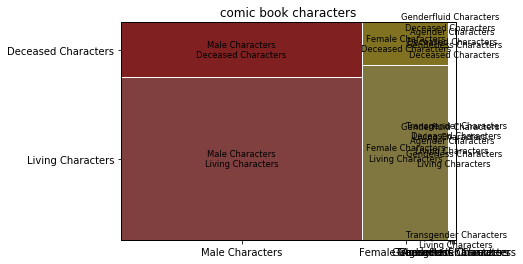

In [58]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(comic_characters, ['sex','alive'],title='comic book characters')

### Q10: Conduct a $\chi^2$ test of ```sex``` and ```alive```. Print out the matrix of expected values as part of your answer

In [59]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  73.20562216398737
p-val =  2.2024678665960208e-14
degree of freedom =  5
Expected:


,0,1
0,10.713517,34.286483
1,1381.567494,4421.432506
2,0.476156,1.523844
3,4.761563,15.238437
4,3909.243192,12510.756808
5,0.238078,0.761922
